# <font color='blue'> Exploratory Data Analysis with Python: Part 1 of 2</font>

### Lise Doucette, Data and Statistics Librarian
### Nich Worby, Government Information and Statistics Librarian
### mdl@library.utoronto.ca

# <font color='blue'> Outline </font>



## <font color='blue'> 1 Overview</font> (Lise)
## <font color='blue'> 2 Import libraries and import your data </font> (Lise)
## <font color='blue'> 3 Getting help </font> (Lise)
## <font color='blue'> 4 Viewing your Data </font> (Lise)
## <font color='blue'> 5 Plotting/Graphing your Data</font> (Lise)
## <font color='blue'> 6 Selecting and filtering your data </font> (Nich)




In Part II, we'll cover:

## <font color='blue'> 8 Create crosstabs and grouping data </font>
## <font color='blue'> 9 Editing data / creating new fields </font>

---

## <font color='blue'> 1 Overview</blue>

- What is Python and why use it?
- Versions of Python
  - many older projects are written in 2.7, but most people new to Python learn version 3
  - can use the following code to determine what version your system is using:

~~~
    from platform import python_version
    print(python_version())
~~~

   
- How Python works - programming languages, objects and methods, libraries, indentation/white space (might integrate with demo)
- Indexing (starts at 0), rows (records) and columns (variables/attributes) (might integrate with demo)
- Using Python - through [Anaconda Navigator](https://www.anaconda.com/distribution/) you can install  Jupyter Lab, Jupyter Notebooks, spyder, a console; [Google Colab](https://colab.research.google.com) is a cloud-based Jupyter notebooks environment.

-- Jupyter notebooks - cells of code and markdown; last line determines output of cell; running cells (change to *); do you expect to see output?

"Anaconda Navigator is a desktop graphical user interface included in Anaconda that allows you to launch applications and easily manage conda packages, environments and channels without the need to use command line commands."
"Anaconda® is a package manager, an environment manager, a Python/R data science distribution, and a collection of over 1,500+ open source packages. "


## <font color='blue'> 2. Import packages/libraries and import your data</font>


### a) Import packages/libraries

Things to consider:
- functionality that you need 
- you may need to install the libraries first using [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/), [conda](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/), or the [command line](https://packaging.python.org/tutorials/installing-packages/)
- use a nickname/short name for libraries that you will be referring to later (there are some common/standard ones)
- syntax for importing packages/libraries:
~~~
import packagename as nickname
~~~
- for plotting in Jupyter notebooks, need to add one more line to tell it to display the plots directly in the notebook
~~~
%matplotlib inline
~~~

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### b) Import existing data

Things to consider:
- where the data is stored
    - same folder as your Jupyter notebook or Python file?  don't need to specify the path
    - different folder?  need to specify path
- file type of data (csv, excel, text, other) and whether you might need a package to help you read the data
- how the data is separated (comma, space, semicolon, other)
- is there a header row with variable names?
- pandas makes some guesses about your data format and type
    - int64, float64, object, bool
- in pandas, your data is stored in a data frame


[Help file and Parameters list for the read_csv 

[Importing Data cheatsheat](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Cheat+Sheets/Importing_Data_Python_Cheat_Sheet.pdf)

In [3]:
titanic = pd.read_csv('titanic.csv', sep=';')

## <font color='blue'>3 Getting help</font>

PLACEHOLDER (LISE)

Let's go through an 'official' help page together.
We’ll have gone through a help page together earlier (crosstab) but can re-emphasize that you can find that kind of documentation for all aspects of python.  Often easier to read online but can also use:
help()
help(nameofthing)

lots of cheat sheets online – link to a few
link to a book(?)
link to a couple of online courses


## <font color='blue'>4. Viewing your Data</font>


### a)  View the first few rows of data

Things to note:
- first row is Row 0
- you can indicate how many rows you want to see by including a number in parentheses (default is 5)

In [4]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### b) Variable/column names and types

Things to consider:
- did pandas guess correctly about the type of data? What can you do if it didn't?  Indicate the type using __.astype__

~~~
titanic['ColumnName'] = titanic['ColumnName'].astype('NewDataType')
~~~
- common data types
  - int64 - integers (whole numbers)
  - float64 - decimal point numbers
  - object - text/string
  - bool - True/False value only

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
titanic['pclass'] = titanic['pclass'].astype('object')

### c) Missing/null data

Things to consider:
- why is the data "missing"? > e.g., not available, not known, participant refused to provide it
- how will missing data affect your analyses? What can you do to address this?
    - need to know when pandas includes/excludes null values

In [93]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### d) View a summary of your variables

Things to consider:
- what kinds of summary measures are meaningful for different variable types?
- how is the mean value of age calculated?
- documentation for formatting of a command: [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [7]:
titanic.describe()
titanic.describe(include='all')

help(titanic.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generate various summary statistics, excluding NaN values.
    
    Parameters
    ----------
    percentiles : array-like, optional
        The percentiles to include in the output. Should all
        be in the interval [0, 1]. By default `percentiles` is
        [.25, .5, .75], returning the 25th, 50th, and 75th percentiles.
    include, exclude : list-like, 'all', or None (default)
        Specify the form of the returned result. Either:
    
        - None to both (default). The result will include only
          numeric-typed columns or, if none are, only categorical columns.
        - A list of dtypes or strings to be included/excluded.
          To select all numeric types use numpy numpy.number. To select
          categorical objects use type object. See also the select_dtypes
          documentation. eg. df.describe(

### e) View more meaningful summary data for categorical data

In [8]:
titanic['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

## <font color='blue'>5. Plotting/Graphing your Data</font>

Different types of plots are appropriate for different types of data.  We'll just explore a couple of types here.  For more information, check out the [Data Visualization Guide](https://mdl.library.utoronto.ca/dataviz/getting-started).

### a) Create a bar plot for categorical data

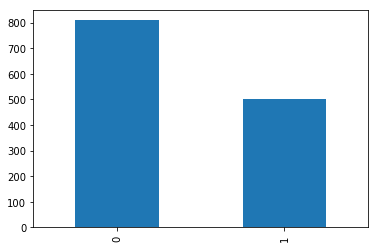

In [96]:
titanic['survived'].value_counts().plot(kind='bar')

### b) Create a histogram for continuous, numerical data

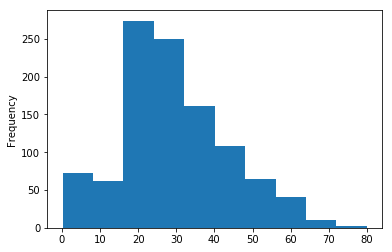

In [97]:
titanic['age'].plot(kind='hist')

## Exercise

1. What was the most common age of passengers on the Titanic? Hint: use value_counts()
2. Create a bar plot of passenger class
3. Add a title to the plot created in exercise 2.  For help on how to do so, try Googling or using python help functions.

In [98]:
titanic['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
25.0000    34
28.0000    32
36.0000    31
27.0000    30
29.0000    30
26.0000    30
19.0000    29
23.0000    26
32.0000    24
20.0000    23
35.0000    23
31.0000    23
45.0000    21
33.0000    21
17.0000    20
39.0000    20
16.0000    19
40.0000    18
42.0000    18
34.0000    16
50.0000    15
47.0000    14
48.0000    14
38.0000    14
2.0000     12
           ..
28.5000     3
18.5000     3
12.0000     3
71.0000     2
45.5000     2
36.5000     2
34.5000     2
14.5000     2
0.9167      2
30.5000     2
70.0000     2
55.5000     1
20.5000     1
0.4167      1
60.5000     1
23.5000     1
22.5000     1
38.5000     1
66.0000     1
24.5000     1
74.0000     1
0.1667      1
0.3333      1
80.0000     1
11.5000     1
26.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: age, Length: 98, dtype: int64

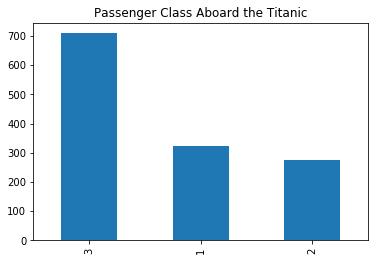

In [99]:
titanic['pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Aboard the Titanic')

## <font color='blue'>6. Selecting and filtering your data</font>

Things to note:
- syntax differences when selecting [one] vs [[multiple]] columns

We're going to access columns by calling them by their name. It's helpful to get a breakdown of all column names by using the .columns function.

In [9]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### a) Select/view one column

In order to select a single column, use the following syntax:

    dataframe['column_name']

In [10]:
titanic['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

### b) Select/view multiple columns

The syntax for selecting multiple columns requires the use of two sets of brackets. Use the following syntax:
        
        dataframe[['col1','col2']]

In [11]:
titanic[ ['name', 'fare'] ]

,name,fare
0,"Allen, Miss. Elisabeth Walton",211.3375
1,"Allison, Master. Hudson Trevor",151.5500
2,"Allison, Miss. Helen Loraine",151.5500
3,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
5,"Anderson, Mr. Harry",26.5500
6,"Andrews, Miss. Kornelia Theodosia",77.9583
7,"Andrews, Mr. Thomas Jr",0.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792
9,"Artagaveytia, Mr. Ramon",49.5042


### c) Select/view specific rows and columns by location


Note: this will return values at the __specific__ row and column labels that you specify (so rows 0:10 will show 11 rows, from Row 0 to Row 10)

We are using the default row labels, which are the row numbers (0,1,2, etc.). If we were using names of individuals as row labels the same code might look like:
        
        titanic.loc['Allen':'Astor',['name','fare']]

In [103]:
titanic.loc[0:10, ['name', 'fare']]

,name,fare
0,"Allen, Miss. Elisabeth Walton",211.3375
1,"Allison, Master. Hudson Trevor",151.5500
2,"Allison, Miss. Helen Loraine",151.5500
3,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
5,"Anderson, Mr. Harry",26.5500
6,"Andrews, Miss. Kornelia Theodosia",77.9583
7,"Andrews, Mr. Thomas Jr",0.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792
9,"Artagaveytia, Mr. Ramon",49.5042


### d) Select/view rows and columns by range of indexes/indices

The iloc method will return location based on index positions rather than labels. This will return values at the ranges of rows and columns that you specify.  In Python, this means from the __lower index to one less than the higher index__ (so rows 0:10 will show 10 rows, from Row 0 to Row 9, and columns 0:3 will show 3 columns, from Column 0 to Column 2)

In [104]:
titanic.iloc[0:10, 2:4]

,name,sex
0,"Allen, Miss. Elisabeth Walton",female
1,"Allison, Master. Hudson Trevor",male
2,"Allison, Miss. Helen Loraine",female
3,"Allison, Mr. Hudson Joshua Creighton",male
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
5,"Anderson, Mr. Harry",male
6,"Andrews, Miss. Kornelia Theodosia",female
7,"Andrews, Mr. Thomas Jr",male
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female
9,"Artagaveytia, Mr. Ramon",male


With __iloc__, you can also choose specific columns using double brackets.

In [105]:
titanic.iloc[0:10, [2,7]]

,name,ticket
0,"Allen, Miss. Elisabeth Walton",24160
1,"Allison, Master. Hudson Trevor",113781
2,"Allison, Miss. Helen Loraine",113781
3,"Allison, Mr. Hudson Joshua Creighton",113781
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781
5,"Anderson, Mr. Harry",19952
6,"Andrews, Miss. Kornelia Theodosia",13502
7,"Andrews, Mr. Thomas Jr",112050
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",11769
9,"Artagaveytia, Mr. Ramon",PC 17609


## Exercise

1. Show the final 10 rows of the data set, and the  name and age destination columns.

(Folllowing are three possible solutions.)

In [106]:
titanic.loc[1299:1309, ['name', 'age']]

,name,age
1299,"Yasbeck, Mr. Antoni",27.0
1300,"Yasbeck, Mrs. Antoni (Selini Alexander)",15.0
1301,"Youseff, Mr. Gerious",45.5
1302,"Yousif, Mr. Wazli",NaN
1303,"Yousseff, Mr. Gerious",NaN
1304,"Zabour, Miss. Hileni",14.5
1305,"Zabour, Miss. Thamine",NaN
1306,"Zakarian, Mr. Mapriededer",26.5
1307,"Zakarian, Mr. Ortin",27.0
1308,"Zimmerman, Mr. Leo",29.0


In [107]:
titanic.iloc[-10:, [2, 4]]

,name,age
1299,"Yasbeck, Mr. Antoni",27.0
1300,"Yasbeck, Mrs. Antoni (Selini Alexander)",15.0
1301,"Youseff, Mr. Gerious",45.5
1302,"Yousif, Mr. Wazli",NaN
1303,"Yousseff, Mr. Gerious",NaN
1304,"Zabour, Miss. Hileni",14.5
1305,"Zabour, Miss. Thamine",NaN
1306,"Zakarian, Mr. Mapriededer",26.5
1307,"Zakarian, Mr. Ortin",27.0
1308,"Zimmerman, Mr. Leo",29.0


In [108]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### e) Select/view data that meets certain conditions (filters)

You can create filters based on numeric conditions:

In [109]:
titanic[titanic['fare'] > 50]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [110]:
titanic[titanic['survived'] == 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"



Filters can also be created for strings:

In [111]:
titanic[titanic['name'].str.contains("Robert")]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
87,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,3,NaN,"Philadelphia, PA"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
202,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,7,NaN,"Philadelphia, PA"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
332,2,0,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,NaN,NaN,Guernsey
335,2,0,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,NaN,174.0,"Jacksonville, FL"


In [112]:
titanic[titanic['name'] == "Chisholm, Mr. Roderick Robert Crispin"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"


### f) Number of rows that meet your conditions


In [113]:
len(titanic[titanic['fare'] > 50])

240

### g) Combine multiple filters

Note: Combine with __&__ (this means AND) or __|__ (this means OR)

In [114]:
titanic[(titanic['fare'] > 50) & (titanic['name'].str.contains(r'\bRobert\b'))]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"


In [115]:
titanic[(titanic['pclass']==1) | (titanic['pclass']==2)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### h) SORTING DATA

Numeric values can be sorted to be displayed either ascending (lowest to highest) or descending values (highest to lowest). Sorting data frames by the value of cells in a particular column uses the following syntax:

        dataframename.sort_values(by=['column'],)
        
Note: The default setting is to sort from lowest to highest. To switch to ordering highest to lowest, add the ascending=False argument.

In [4]:
titanic.sort_values(by=['age'], )

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
1111,3,0,"Peacock, Master. Alfred Edward",male,0.7500,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN
657,3,1,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
359,2,1,"Caldwell, Master. Alden Gates",male,0.8333,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
611,3,1,"Aks, Master. Philip Frank",male,0.8333,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
548,2,1,"Richards, Master. George Sibley",male,0.8333,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"


In [10]:
titanic.sort_values(by=['age'], ascending = False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
506,2,0,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,NaN,NaN,"Guernsey / Montclair, NJ and/or Toledo, Ohio"
285,1,0,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,96.0,"New York, NY"
594,2,0,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"


## Exercise

1. Create a filter that lists passengers who did not survive
2. Combine the filters we created earlier to create a list of passengers with the name Robert who survived
3. Create a filter that lists passengers in class 1 who were more than 30 years old
4. How many passengers fit the criteria from question 3?
5. Create a filter to search for passengers with the following honorific titles in their names: Sir, Lady, Jonkheer.


In [116]:
titanic[titanic['survived'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA"


In [117]:
titanic[(titanic['name'].str.contains("Robert")) & (titanic['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
87,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,3,NaN,"Philadelphia, PA"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
202,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,7,NaN,"Philadelphia, PA"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"


In [118]:
titanic[(titanic['pclass']==1) & (titanic['age']>30)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"


In [119]:
len(titanic[(titanic['pclass']==1) & (titanic['age']>30)])

195

In [9]:
titanic[(titanic['name'].str.contains("Sir")) | (titanic['name'].str.contains("Lady")) | (titanic['name'].str.contains("Jonkheer"))]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
1201,3,0,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,NaN,NaN,NaN
1202,3,0,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,NaN,NaN,NaN
